# Rules extractor

Use this notebook to extract low-level rules from the game (ie: create low level tiles).

In [73]:
import numpy as np
import os
import xml.etree.ElementTree as ET

from pcgsepy.common.vecs import Orientation, orientation_from_vec, Vec
from pcgsepy.xml_conversion import convert_xml_to_structure

In [74]:
BLUEPRINTS_DIR = 'tileset'

In [75]:
# quick way to load all available rules
if False:
    from pcgsepy.xml_conversion import extract_rule
    available_tiles = os.listdir(BLUEPRINTS_DIR)
    for tile in available_tiles:
        rule, dims = extract_rule(bp_dir=os.path.join(BLUEPRINTS_DIR, tile))
        print(f'----\n{tile} 1 {rule}')
        print({
            tile: {
                'dimensions': [dims[0], dims[1], dims[2]],
                'offset': 5
            }
        })

In [76]:
available_tiles = os.listdir(BLUEPRINTS_DIR)

print('Available tiles:')
for i, tile in enumerate(available_tiles):
    print(f"  {i+1}. {tile}")
t = int(input('Choose which tile to process (number): ')) - 1
assert t > -1 and t < len(available_tiles), f'Invalid tile index: {t}'
rule_name = input("Enter name of tile (leave blank to use folder's): ")
rule_name = rule_name if rule_name else available_tiles[t]

Available tiles:
  1. Alt_CorridorWithCargo
  2. Alt_Thrusters
  3. Cockpit
  4. CorridorSimple
  5. CorridorWall
  6. CorridorWithCargo
  7. CorridorWithGyroscopes
  8. CorridorWithLights
  9. CorridorWithReactors
  10. Thrusters
  11. YccwXintersection
  12. YccwXYccwZintersection
  13. YccwXYccwZYcwXintersection
  14. YccwXYccwZYcwXYcwZintersection
  15. YccwXYccwZYcwZintersection
  16. YccwXYcwXintersection
  17. YccwXYcwXYcwZintersection
  18. YccwXYcwZintersection
  19. YccwZintersection
  20. YccwZYcwXintersection
  21. YccwZYcwXYcwZintersection
  22. YccwZYcwZintersection
  23. YcwXintersection
  24. YcwXYcwZintersection
  25. YcwZintersection


Choose which tile to process (number):  2
Enter name of tile (leave blank to use folder's):  thrusters


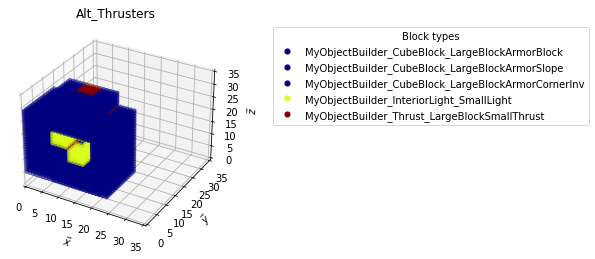

In [77]:
blueprint_directory = os.path.join(BLUEPRINTS_DIR, available_tiles[t])
bp = os.path.join(blueprint_directory, 'bp.sbc')

root = ET.parse(bp).getroot()
structure = convert_xml_to_structure(root_node=root)
structure.sanify()

structure.show(available_tiles[t])

blocks = structure.get_all_blocks()

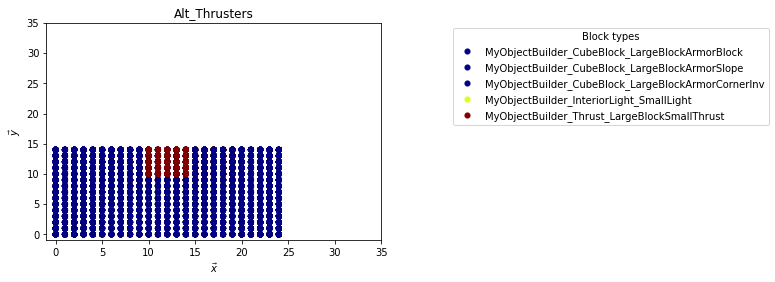

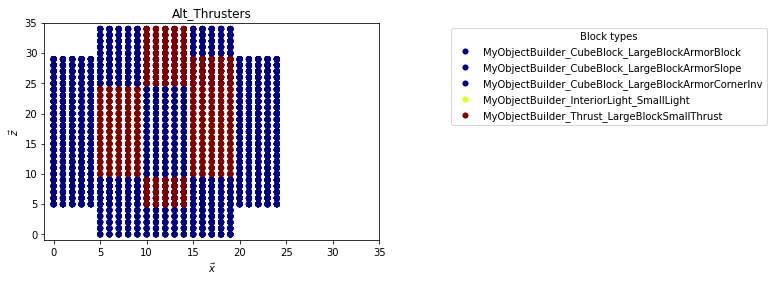

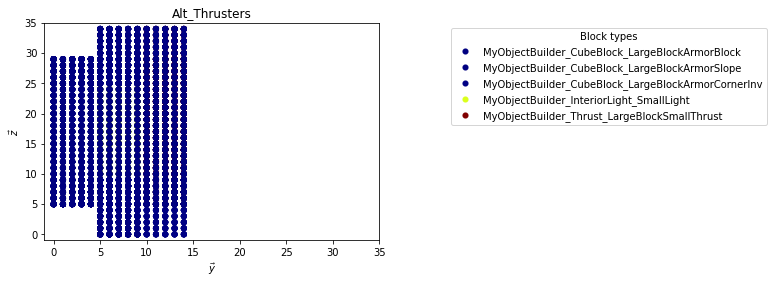

In [78]:
import matplotlib.pyplot as plt

plottable = structure.as_array()
arr = np.nonzero(plottable)
x, y, z = arr
cs = [plottable[i, j, k] for i, j, k in zip(x, y, z)]

for vs, ls in zip([(x, y), (x, z), (y, z)],
                  [("$\\vec{x}$", "$\\vec{y}$"),
                   ("$\\vec{x}$", "$\\vec{z}$"),
                   ("$\\vec{y}$", "$\\vec{z}$")]):
    ax = plt.axes()
    scatter = ax.scatter(vs[0], vs[1], c=cs, cmap='jet', linewidth=0.1)
    legend = scatter.legend_elements()
    for i, v in zip(range(len(legend[1])),
                    np.unique(plottable[arr])):
        legend[1][i] = structure.ks[v - 1]
    ax.legend(*legend,
              bbox_to_anchor=(1.2, 1),
              loc="upper left",
              title="Block types")
    axis_limit = max(plottable.shape)
    ax.set_xlim(-1, axis_limit)
    ax.set_ylim(-1, axis_limit)
    ax.set_xlabel(ls[0])
    ax.set_ylabel(ls[1])
    plt.title(available_tiles[t])
    plt.show()

In [79]:
offset_x = int(input('Enter offset along X: '))
assert offset_x > -1, f'Invalid offset: {offset_x}'
offset_y = int(input('Enter offset along Y: '))
assert offset_y > -1, f'Invalid offset: {offset_y}'
offset_z = int(input('Enter offset along Z: '))
assert offset_z > -1, f'Invalid offset: {offset_z}'

Enter offset along X:  0
Enter offset along Y:  0
Enter offset along Z:  5


In [80]:
blocks

[MyObjectBuilder_CubeBlock_LargeBlockArmorBlock at {'X': 10.0, 'Y': 0.0, 'Z': 5.0}; OF {'X': 0, 'Y': 0, 'Z': -1}; OU {'X': 0, 'Y': 1, 'Z': 0},
 MyObjectBuilder_CubeBlock_LargeBlockArmorBlock at {'X': 10.0, 'Y': 0.0, 'Z': 7.5}; OF {'X': 0, 'Y': 0, 'Z': -1}; OU {'X': 0, 'Y': 1, 'Z': 0},
 MyObjectBuilder_CubeBlock_LargeBlockArmorBlock at {'X': 10.0, 'Y': 0.0, 'Z': 10.0}; OF {'X': 0, 'Y': 0, 'Z': -1}; OU {'X': 0, 'Y': 1, 'Z': 0},
 MyObjectBuilder_CubeBlock_LargeBlockArmorBlock at {'X': 10.0, 'Y': 2.5, 'Z': 5.0}; OF {'X': 0, 'Y': 0, 'Z': -1}; OU {'X': 0, 'Y': 1, 'Z': 0},
 MyObjectBuilder_CubeBlock_LargeBlockArmorBlock at {'X': 10.0, 'Y': 2.5, 'Z': 7.5}; OF {'X': 0, 'Y': 0, 'Z': -1}; OU {'X': 0, 'Y': 1, 'Z': 0},
 MyObjectBuilder_CubeBlock_LargeBlockArmorBlock at {'X': 10.0, 'Y': 2.5, 'Z': 10.0}; OF {'X': 0, 'Y': 0, 'Z': -1}; OU {'X': 0, 'Y': 1, 'Z': 0},
 MyObjectBuilder_CubeBlock_LargeBlockArmorBlock at {'X': 10.0, 'Y': 5.0, 'Z': 5.0}; OF {'X': 0, 'Y': 0, 'Z': -1}; OU {'X': 0, 'Y': 1, 'Z': 0

In [81]:
max_x, max_y, max_z = 0., 0., 0.

for block in blocks:
    x, y, z = block.position.as_tuple()
    if x > max_x:
        max_x = x
    if y > max_y:
        max_y = y
    if z > max_z:
        max_z = z

In [82]:
min_x, min_y, min_z = max_x, max_y, max_z

for block in blocks:
    x, y, z = block.position.as_tuple()
    if x < min_x:
        min_x = x
    if y < min_y:
        min_y = y
    if z < min_z:
        min_z = z

In [83]:
for block in blocks:
    new_p = block.position.sum(Vec.v3f(-min_x, -min_y, -min_z))
    block.position = Vec.v3f(x=np.round(new_p.x, 1),
                             y=np.round(new_p.y, 1),
                             z=np.round(new_p.z, 1))

In [84]:
max_x -= min_x
max_y -= min_y
max_z -= min_z

In [85]:
def at_same_x(x, blocks):
    r = []
    for b in blocks:
        if b.position.x == x:
            r.append(b)
    return r


def at_same_y(y, blocks):
    r = []
    for b in blocks:
        if b.position.y == y:
            r.append(b)
    return r


def at_same_z(z, blocks):
    r = []
    for b in blocks:
        if b.position.z == z:
            r.append(b)
    return r

In [86]:
ordered_blocks = []
x, y, z = 0., 0., 0.
while z <= max_z:
    bs1 = at_same_z(z, blocks)
    while y <= max_y:
        bs2 = at_same_y(y, bs1)
        while x <= max_x:
            b = at_same_x(x, bs2)
            if b:
                ordered_blocks.append(b[0])
            x += 0.5
        x = 0.
        y += 0.5
    x = 0.
    y = 0.
    z += 0.5

In [87]:
orientations_str = {
    Orientation.FORWARD: 'F',
    Orientation.BACKWARD: 'B',
    Orientation.RIGHT: 'R',
    Orientation.LEFT: 'L',
    Orientation.UP: 'U',
    Orientation.DOWN: 'D',
}

In [88]:
rule = ''

if offset_x != 0:
    rule += f'{"+" if offset_x > 0 else "-"}({abs(offset_x)})'
if offset_y != 0:
    rule += f'{"!" if offset_x > 0 else "?"}({abs(offset_y)})'
if offset_z > 0:
    rule += f'{"<" if offset_x > 0 else ">"}({abs(offset_z)})'

x, y, z = 0., 0., 0.
for block in ordered_blocks:
    if block.position.z != z:
        if block.position.z > z:
            dz = block.position.z - z
            rule += f'<({int(dz // 0.5)})'
            z = block.position.z
        else:
            dz = z - block.position.z
            rule += f'>({int(dz // 0.5)})'
            z = block.position.z
    if block.position.y != y:
        if block.position.y > y:
            dy = block.position.y - y
            rule += f'!({int(dy // 0.5)})'
            y = block.position.y
        else:
            dy = y - block.position.y
            rule += f'?({int(dy // 0.5)})'
            y = block.position.y
    if block.position.x != x:
        if block.position.x > x:
            dx = block.position.x - x
            rule += f'+({int(dx // 0.5)})'
            x = block.position.x
        else:
            dx = x - block.position.x
            rule += f'-({int(dx // 0.5)})'
            x = block.position.x
    of = orientations_str[orientation_from_vec(block.orientation_forward)]
    ou = orientations_str[orientation_from_vec(block.orientation_up)]
    rule += f'{block.block_type}({of},{ou})'

if x != 0.:
    if x > 0.:
        rule += f'-({int(x // 0.5)})'
    if x < 0.:
        rule += f'+({int(-x // 0.5)})'
if y != 0.:
    if y > 0.:
        rule += f'?({int(y // 0.5)})'
    if y < 0.:
        rule += f'!({int(-y // 0.5)})'
if z != 0.:
    if z > 0.:
        rule += f'>({int(z // 0.5)})'
    if z < 0.:
        rule += f'<({int(-z // 0.5)})'

if offset_x != 0:
    rule += f'{"-" if offset_x > 0 else "+"}({abs(offset_x)})'
if offset_y != 0:
    rule += f'{"?" if offset_x > 0 else "!"}({abs(offset_y)})'
if offset_z > 0:
    rule += f'{">" if offset_x > 0 else "<"}({abs(offset_z)})'

In [89]:
print(f'RULE: {rule_name}')
print(rule)
x, y, z = structure._max_dims
print(f'\nTILE DIMENSIONS: {x+5, y+5, z+5}')

RULE: thrusters
>(5)!(5)+(5)MyObjectBuilder_CubeBlock_LargeBlockArmorSlope(B,D)+(5)MyObjectBuilder_CubeBlock_LargeBlockArmorSlope(B,D)+(5)MyObjectBuilder_CubeBlock_LargeBlockArmorSlope(B,D)!(5)MyObjectBuilder_CubeBlock_LargeBlockArmorCornerInv(U,B)<(5)?(10)-(15)MyObjectBuilder_CubeBlock_LargeBlockArmorSlope(B,L)+(5)MyObjectBuilder_CubeBlock_LargeBlockArmorBlock(F,U)+(5)MyObjectBuilder_CubeBlock_LargeBlockArmorBlock(F,U)+(5)MyObjectBuilder_CubeBlock_LargeBlockArmorBlock(F,U)+(5)MyObjectBuilder_CubeBlock_LargeBlockArmorSlope(B,R)!(5)-(20)MyObjectBuilder_CubeBlock_LargeBlockArmorSlope(B,L)+(5)MyObjectBuilder_CubeBlock_LargeBlockArmorBlock(F,U)+(5)MyObjectBuilder_CubeBlock_LargeBlockArmorBlock(F,U)+(5)MyObjectBuilder_CubeBlock_LargeBlockArmorBlock(F,U)+(5)MyObjectBuilder_CubeBlock_LargeBlockArmorSlope(B,R)!(5)-(20)MyObjectBuilder_CubeBlock_LargeBlockArmorSlope(B,L)+(5)MyObjectBuilder_CubeBlock_LargeBlockArmorBlock(F,U)+(5)MyObjectBuilder_Thrust_LargeBlockSmallThrust(U,B)+(5)MyObjectBuilder